# **Importing Basic Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("..\dataset\FedCycleData071012.csv")
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sahit\AppData\Local\Temp\ipykernel_972\3329109010.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\dataset\FedCycleData071012.csv")


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [4]:
df.drop('UnusualBleeding', axis=1, inplace=True)

# EDA And Data Cleaning

In [25]:
df.shape

(1665, 80)

In [26]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

**There are missing values in almost all columns as whitespace " " So let's replace them with nan**

In [5]:
df =df.replace(' ', np.nan)

In [6]:
df.isnull().sum()

ClientID                   0
CycleNumber                0
Group                      0
CycleWithPeakorNot         0
ReproductiveCategory       0
                        ... 
NextpregM               1524
Spousesame              1523
SpousesameM             1523
Timeattemptpreg         1523
BMI                     1534
Length: 79, dtype: int64

In [29]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:   
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)
        
    else:
        cols_with_missing_cols.append(cols)
        
print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  6

Number of Columns with missing values :  74


**There are 74 columns with missing values now let's handle them**

In [7]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})


C:\Users\sahit\AppData\Local\Temp\ipykernel_14896\2340846351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


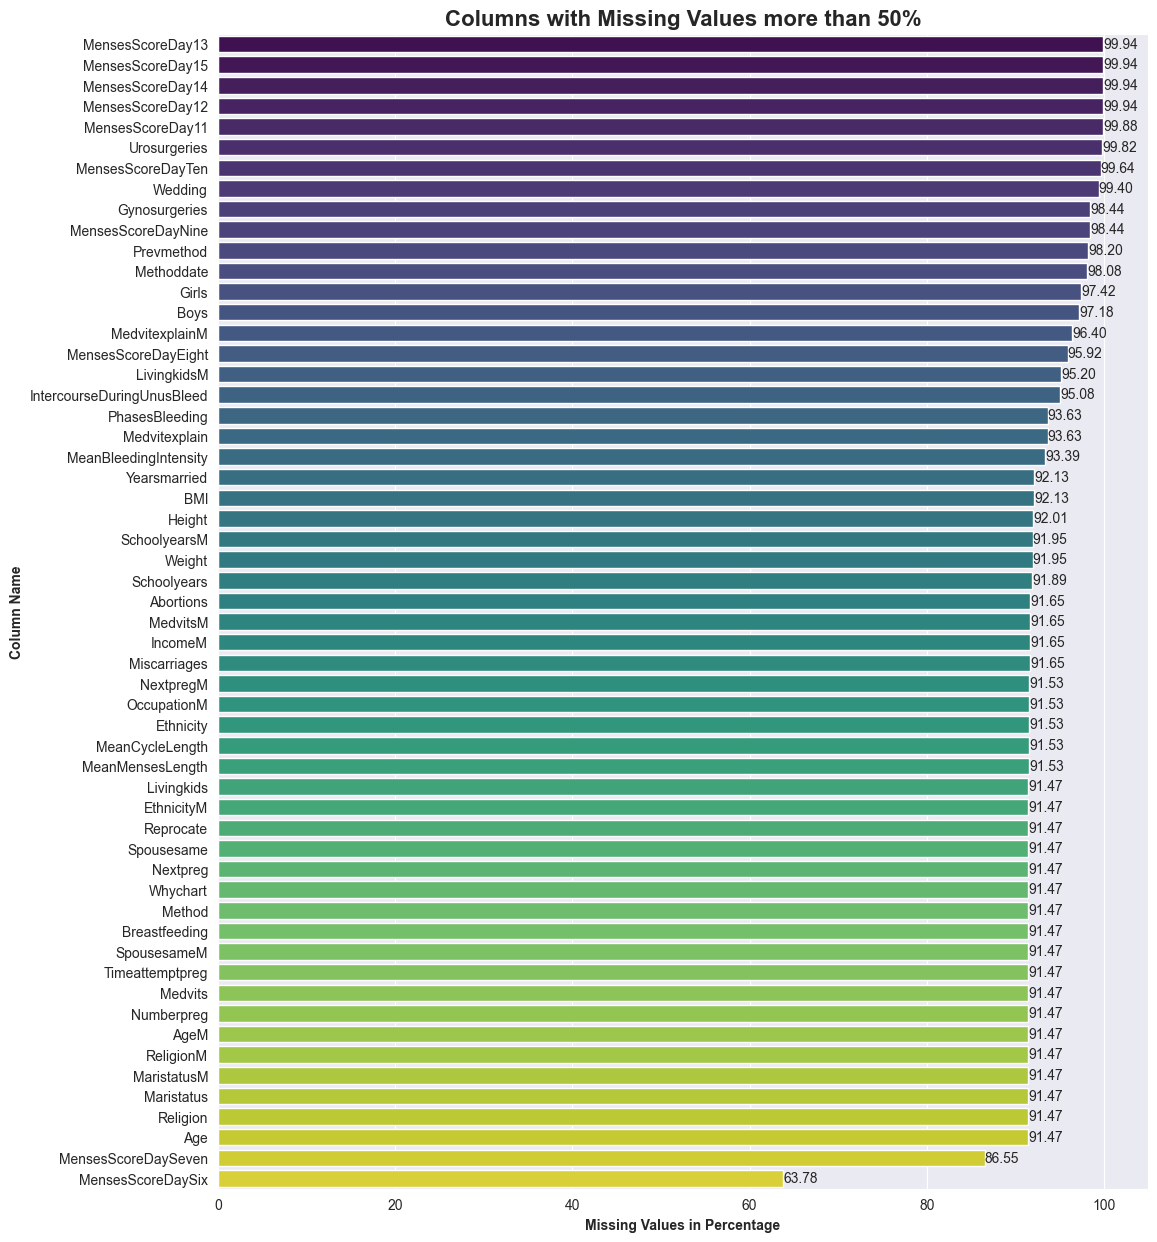

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

C:\Users\sahit\AppData\Local\Temp\ipykernel_14896\2914675841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


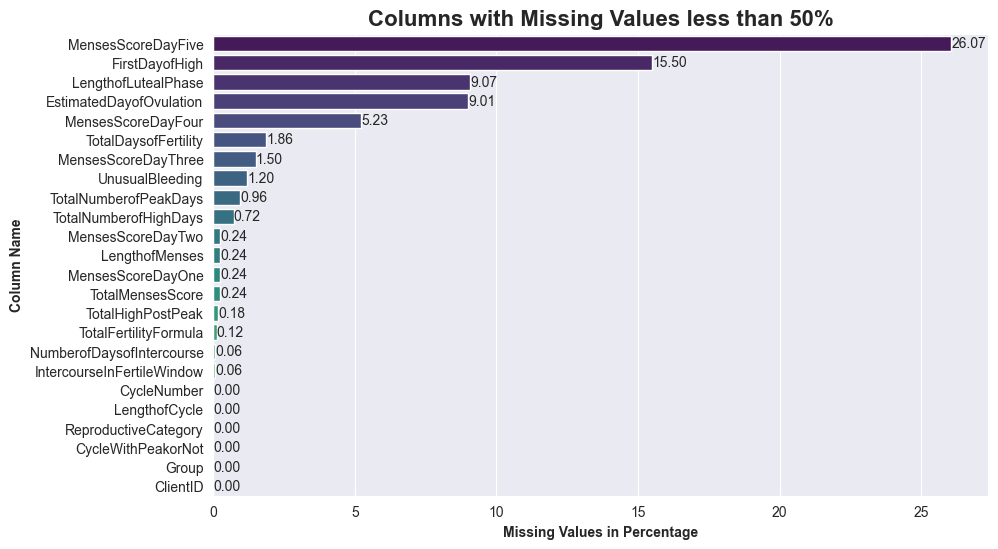

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

**Removing Columns that have more than 50% of missing values**

In [8]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)


**Removing "ClientID" since it will not contribute in predicting Cycle Length**

In [9]:
df = df.drop(columns="ClientID")

In [10]:
df.shape

(1665, 22)

In [36]:
df.dtypes

CycleNumber                    int64
Group                          int64
CycleWithPeakorNot             int64
ReproductiveCategory           int64
LengthofCycle                  int64
EstimatedDayofOvulation       object
LengthofLutealPhase           object
FirstDayofHigh                object
TotalNumberofHighDays         object
TotalHighPostPeak             object
TotalNumberofPeakDays         object
TotalDaysofFertility          object
TotalFertilityFormula         object
LengthofMenses                object
MensesScoreDayOne             object
MensesScoreDayTwo             object
MensesScoreDayThree           object
MensesScoreDayFour            object
MensesScoreDayFive            object
TotalMensesScore              object
NumberofDaysofIntercourse     object
IntercourseInFertileWindow    object
UnusualBleeding               object
dtype: object

In [12]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,TotalFertilityFormula,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow
0,1,0,1,0,29,17,12,12,5,0,...,15,5,3,3,2,1,1,10,5,1
1,2,0,1,0,27,15,12,13,2,0,...,13,5,3,3,2,1,1,10,6,1
2,3,0,1,0,29,15,14,NaN,1,0,...,13,5,3,3,2,1,1,10,5,1
3,4,0,1,0,27,15,12,13,2,0,...,13,5,3,3,3,2,1,12,3,0
4,5,0,1,0,28,16,12,12,4,0,...,14,5,3,3,2,2,1,11,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,19,10,13,5,0,...,15,8,2,3,3,2,2,15,8,0
1661,8,1,1,0,28,17,11,12,3,0,...,13,6,3,3,2,1,1,11,11,1
1662,9,1,1,0,28,16,12,11,4,0,...,12,5,3,2,2,1,1,9,7,0
1663,10,1,1,1,40,27,13,13,13,0,...,24,6,2,3,3,2,1,12,3,0


In [17]:
categorical_columns = df.select_dtypes(include= object).columns
categorical_columns

Index(['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow'],
      dtype='object')

**Checking distribution Of Data**

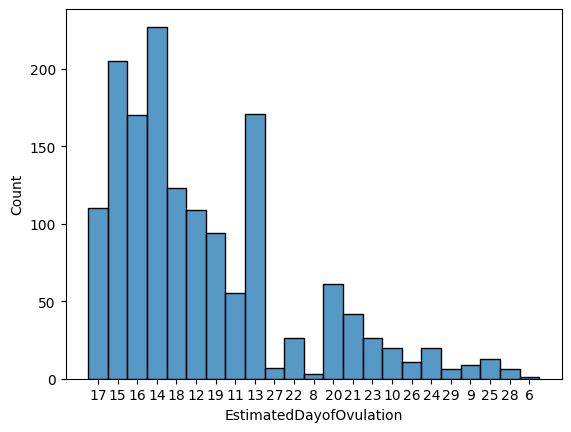

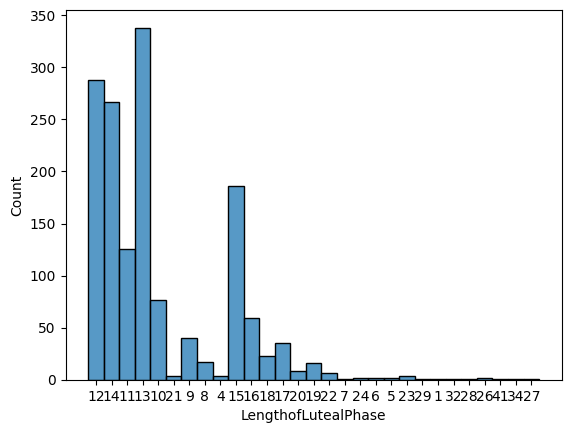

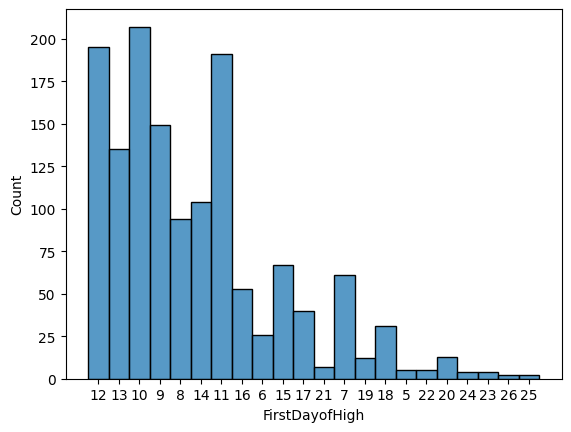

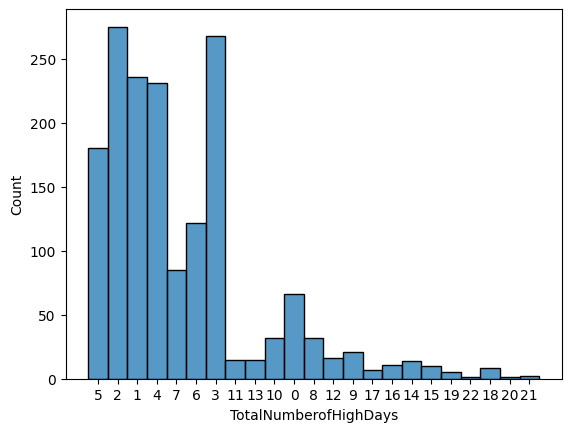

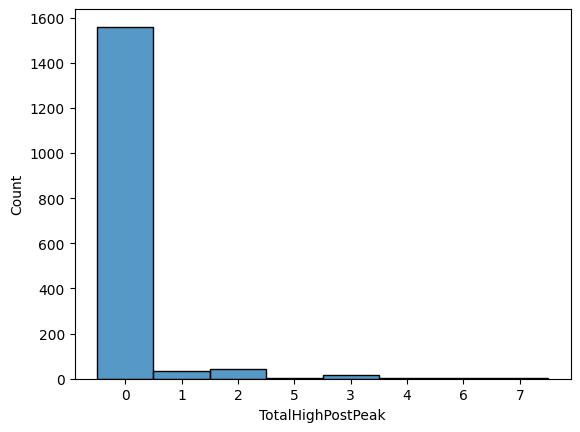

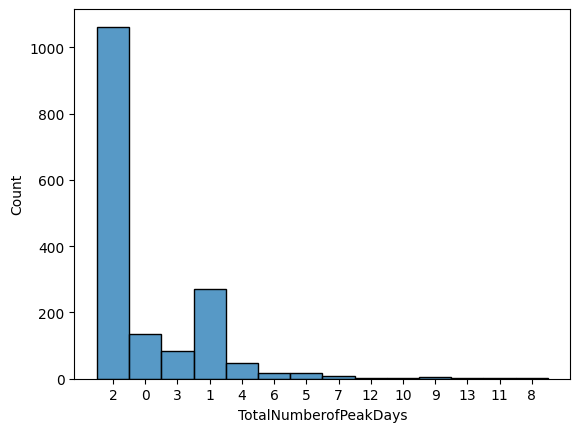

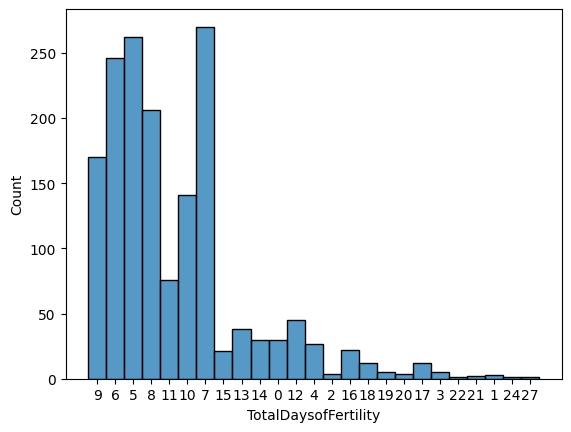

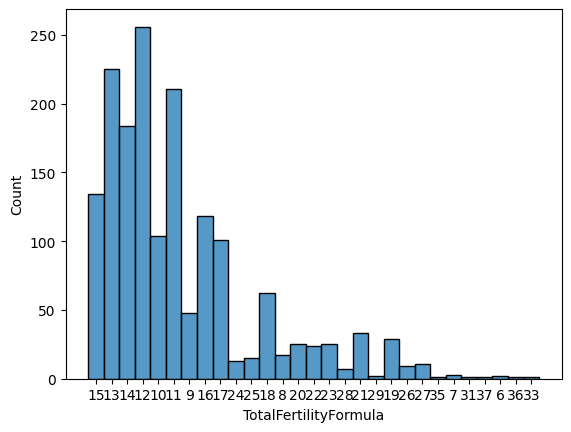

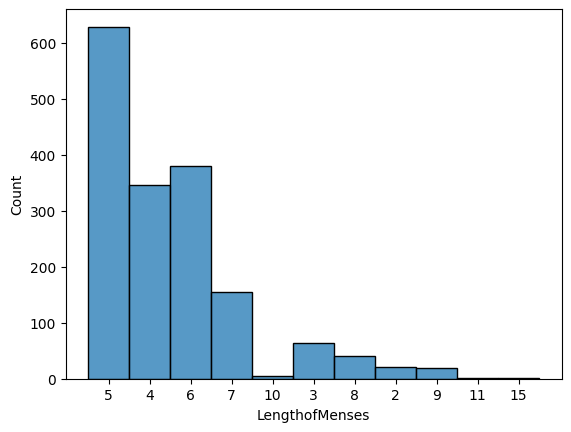

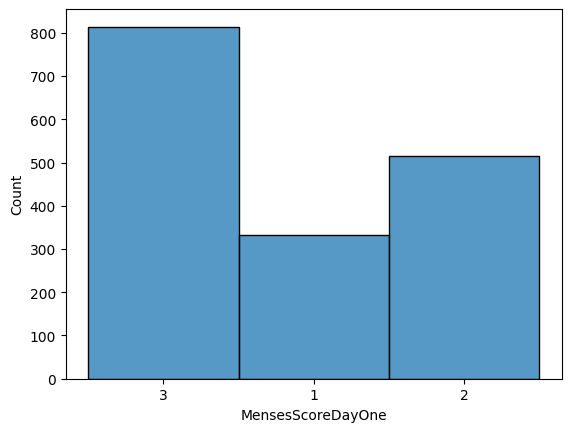

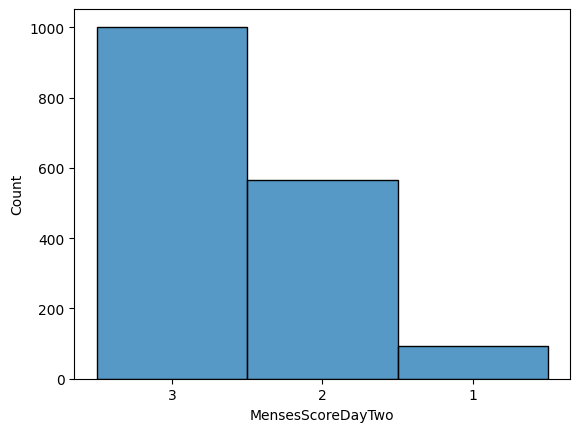

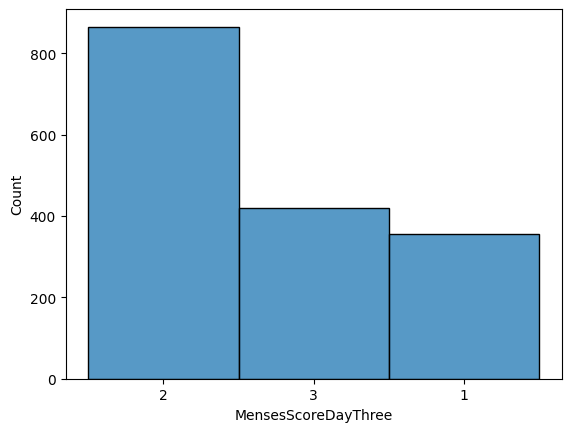

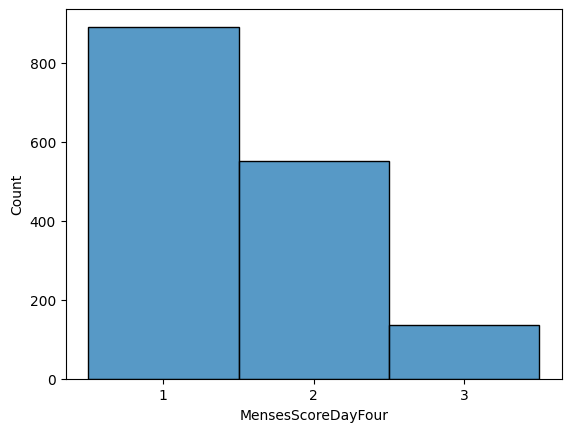

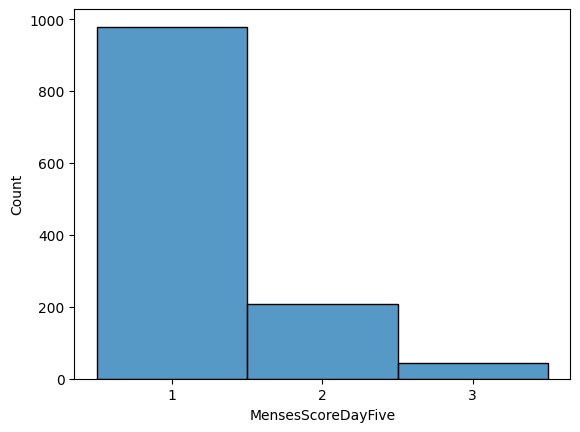

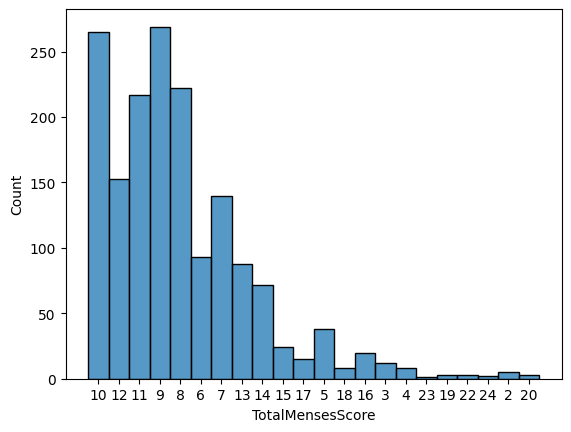

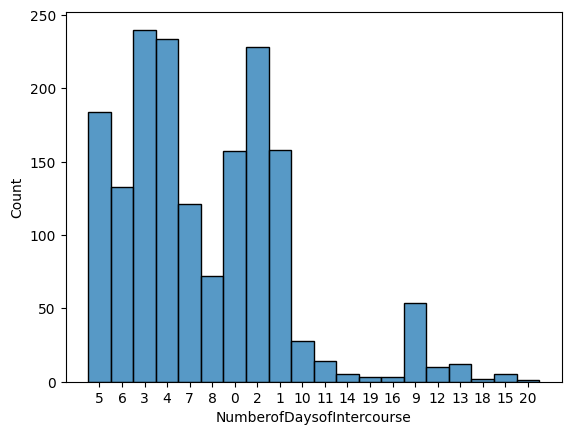

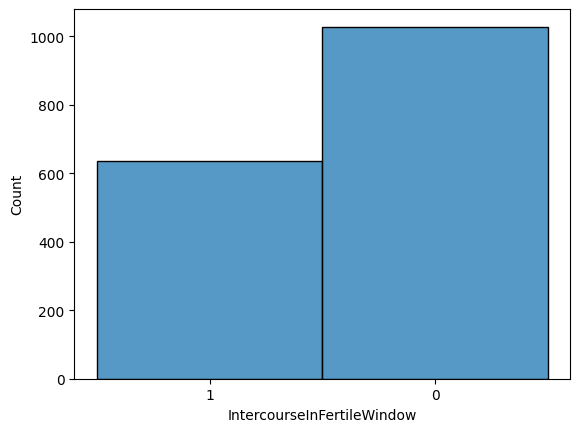

In [18]:
for i in categorical_columns:    
    sns.histplot(data=df[i])
    plt.show()

In [19]:
encoder = LabelEncoder()

for cols in categorical_columns:       
        df[cols] = pd.to_numeric(df[cols])
        df[cols] = encoder.fit_transform(df[cols])

In [20]:
for i in df.columns:
    if ( df[i].isnull().sum() ) > 100:
        df[i]= df[i].fillna(df[i].mean())

**Updated Dataset**

In [41]:
df.columns

Index(['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory',
       'LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak',
       'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne',
       'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding'],
      dtype='object')

In [42]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


In [21]:
df.drop_duplicates()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,TotalFertilityFormula,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow
0,1,0,1,0,29,10,9,7,5,0,...,9,3,2,2,1,0,0,8,5,1
1,2,0,1,0,27,8,9,8,2,0,...,7,3,2,2,1,0,0,8,6,1
2,3,0,1,0,29,8,11,22,1,0,...,7,3,2,2,1,0,0,8,5,1
3,4,0,1,0,27,8,9,8,2,0,...,7,3,2,2,2,1,0,10,3,0
4,5,0,1,0,28,9,9,7,4,0,...,8,3,2,2,1,1,0,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,9,6,1,2,2,1,1,13,8,0
1661,8,1,1,0,28,10,8,7,3,0,...,7,4,2,2,1,0,0,9,11,1
1662,9,1,1,0,28,9,9,6,4,0,...,6,3,2,1,1,0,0,7,7,0
1663,10,1,1,1,40,20,10,8,13,0,...,18,4,1,2,2,1,0,10,3,0


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
Group,1665.0,0.382583,0.486164,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
LengthofCycle,1665.0,29.299099,3.887932,18.0,27.0,29.0,31.0,54.0
EstimatedDayofOvulation,1665.0,10.228228,5.254078,0.0,7.0,9.0,12.0,23.0
LengthofLutealPhase,1665.0,11.957357,5.911200,0.0,9.0,10.0,12.0,29.0
FirstDayofHigh,1665.0,9.123123,6.274460,0.0,5.0,7.0,11.0,22.0
TotalNumberofHighDays,1665.0,4.383183,3.833958,0.0,2.0,3.0,5.0,23.0
TotalHighPostPeak,1665.0,0.147748,0.697546,0.0,0.0,0.0,0.0,8.0


# **Handling Outliers**

In [45]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


In [46]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


Since variables in our dataset do not have a strong correlation with the target variable, traditional linear models like linear regression might not perform well.

In [47]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,1,0,1,0,29,10,9,7,5,0,...,3,2,2,1,0,0,8,5,1,0
1,2,0,1,0,27,8,9,8,2,0,...,3,2,2,1,0,0,8,6,1,0
2,3,0,1,0,29,8,11,22,1,0,...,3,2,2,1,0,0,8,5,1,0
3,4,0,1,0,27,8,9,8,2,0,...,3,2,2,2,1,0,10,3,0,0
4,5,0,1,0,28,9,9,7,4,0,...,3,2,2,1,1,0,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,6,1,2,2,1,1,13,8,0,1
1661,8,1,1,0,28,10,8,7,3,0,...,4,2,2,1,0,0,9,11,1,0
1662,9,1,1,0,28,9,9,6,4,0,...,3,2,1,1,0,0,7,7,0,0
1663,10,1,1,1,40,20,10,8,13,0,...,4,1,2,2,1,0,10,3,0,0


In [23]:
y = df["LengthofCycle"]
x = df.drop('LengthofCycle', axis=1)

In [24]:
scaler =StandardScaler()
x= scaler.fit_transform(x)

In [25]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,train_size=0.8, random_state= 42)

# **Random Forest Regressor**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
random_forest = RandomForestRegressor(n_estimators= 49, criterion="squared_error", max_depth= 67)

In [28]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=67, n_estimators=49)

In [29]:
y_pred = random_forest.predict(x_test)

In [31]:
for i in y_pred:
    if i > 30:
        print(i)

31.122448979591837
36.204081632653065
39.40816326530612
32.55102040816327
31.3265306122449
38.61224489795919
30.489795918367346
31.755102040816325
33.38775510204081
34.795918367346935
31.20408163265306
32.12244897959184
37.285714285714285
34.06122448979592
32.53061224489796
36.57142857142857
38.55102040816327
39.04081632653061
36.755102040816325
31.122448979591837
33.69387755102041
31.081632653061224
30.79591836734694
38.69387755102041
31.653061224489797
38.6530612244898
32.795918367346935
32.285714285714285
32.02040816326531
30.897959183673468
30.387755102040817
33.95918367346939
34.12244897959184
33.183673469387756
33.734693877551024
32.775510204081634
32.51020408163265
34.326530612244895
32.10204081632653
32.69387755102041
31.73469387755102
31.551020408163264
36.326530612244895
33.06122448979592
31.959183673469386
31.020408163265305
32.285714285714285
32.816326530612244
30.3265306122449
34.816326530612244
30.979591836734695
35.42857142857143
38.87755102040816
37.48979591836735
30.59

<Axes: >

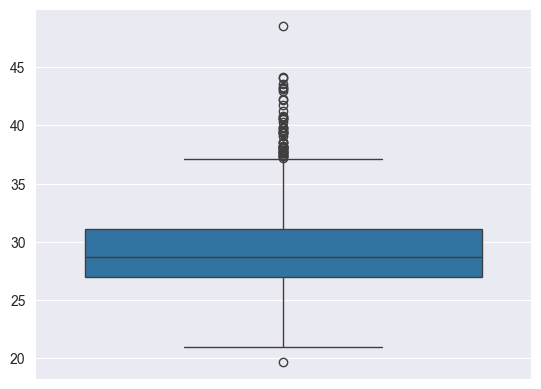

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.3332207628710588


In [58]:
df['UnusualBleeding'].value_counts()

UnusualBleeding
0    1547
1      98
2      20
Name: count, dtype: int64

# **XGB** 

In [59]:
import xgboost as xgb

In [60]:
simple_reg= xgb.XGBRegressor(objective="reg:squarederror", seeds= 123)
simple_reg.fit(x_train,y_train)

y_pred = simple_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "seeds" } are not used.

  warnings.warn(smsg, UserWarning)


1.3228873158512564


In [61]:
predicted_length_of_cycle = simple_reg.predict(user_input_scaled)

print(f"Predicted Length of Cycle: {predicted_length_of_cycle[0]}")

NameError: name 'user_input_scaled' is not defined

In [52]:
import pickle

# Save the model to a file using pickle
with open('menstrual_cycle_predictor_model.pkl', 'wb') as model_file:
    pickle.dump(simple_reg, model_file)


In [ ]:
df

In [71]:
y = df["UnusualBleeding"]
x = df.drop('UnusualBleeding', axis=1)

In [ ]:
print(df.iloc[1660])


In [ ]:
df.shape

In [88]:
df['UnusualBleeding'] = df['UnusualBleeding'].replace(0.082883, 1.0000)

In [ ]:
df['UnusualBleeding'].value_counts()

In [54]:
from sklearn.ensemble import RandomForestClassifier;

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)


In [ ]:
y_pred

In [40]:


# Assume 'random_forest' is your pre-trained model, and 'scaler' is your fitted scale
# Example of user input (replace these with actual values the user provides, without the target 'LengthofCycle')
user_input = {
    'CycteNumber': 30,
    'Group': 1,
    'CycteWithPeakorNot': 1.0,
    'ReproductiveCategory': 0.000000,
    'EstimatedDayofOvutation': 15,
    'LengthofLuteatPhase': 15,
    'FirstDayofHigh': 15,
    'TotatNumberofHighDays': 5.000000,
    'TotatHighPostPeak': 0.000000,
    'TotatDaysofFertitity': 6,
    'TotatNumberofPeakDays': 2.0,
    'TotatFertitityFormuta': 9,
    'LengthofMenses': 10,
    'MensesScoreDayOne': 5,
    'MensesScoreDayTwo': 5,
    'MensesScoreDayThree': 5,
    'MensesScoreDayFour': 5,
    'MensesScoreDayFive': 5,
    'TotatMensesScore': 15,
    'NumberofDaysofIntercourse': 8,
    'IntercourseInFertiteWindow': 7
}


# Remove the 'LengthofCycle' (target value) 


user_input_values = np.array([list(user_input.values())])

# Apply the same scaling used in training
user_input_scaled = scaler.transform(user_input_values)

# Predict the Length of Cycle using the trained Random Forest model
predicted_length_of_cycle = random_forest.predict(user_input_scaled)

print(f"Predicted unsual: {predicted_length_of_cycle[0]}")


Predicted unsual: 37.183673469387756


c:\Users\sahit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
import pickle

In [41]:
with open('date_predictor.pkl', 'wb') as file:
    pickle.dump(random_forest, file)